# Problema

Problema propune gasirea a celor mai bune modele pentru predictia a patru clase (rase) de caini (Task 1) si a longevitatii acestora (Task 2) pe baza unor feature-uri care sunt atat continue cat si categorice. Pentru predictia claselor se vor incerca modele de clasificare (Logistic Regression, Random Forest si KNN), iar pentru predictia longevitatii se vor incerca modele pentru regresie (Linear Regression, Ridge, Lasso, KNN Regression).

Setul de date contine si valori nule (valori care nu au fost atribuite). Conform analizei de mai jos, exista o singura coloana cu aceasta proprietate. Totodata, setul de date contine si informatii care nu pot influenta rezultatele. Prin urmare se renunta la aceste coloane ("Owner Name").

In [430]:
# imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

%matplotlib inline

# Citirea setului de date

In [431]:
dataset = pd.read_csv("Holteiu_N_Daniel_Ninel_train.csv")

In [432]:
dataset

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy level,Attention Needs,Coat Lenght,Sex,Owner Name
0,Amstaff,27412.4472,46.4779,12.7271,med,high,short,male,Mosley
1,Amstaff,33302.6172,NaN,12.9844,low,med,short,female,Crane
2,Airedale Terrier,19184.9322,57.7801,10.1529,high,high,med,female,Thomas
3,Amstaff,26228.6536,45.6682,13.5366,low,med,med,female,Oliver
4,Daschhund,7720.7755,20.1153,13.8247,high,med,short,male,Williams
5,Airedale Terrier,20379.5337,57.5140,10.2833,high,high,short,male,Hoffman
6,Airedale Terrier,21246.1613,NaN,11.4508,high,high,med,male,Herrera
7,Airedale Terrier,21491.1460,56.7838,12.8966,high,high,med,male,Cardenas
8,Airedale Terrier,21740.7510,NaN,11.4410,high,high,short,female,Johnson
9,Jack Russel Terrier,6820.8519,33.5175,13.6113,high,med,short,female,Campbell


# Task 1

## Encodare Breed Name (Labels)

"Breed Name", pentru task-ul 1 este label-ul. Fiind un sir de caractere acesta va fi encodat cu numere intre 0 si numarul de siruri unice (in cazul de fata 4).

Totodata, pentru task-ul 1 se renunta si la coloana "Longevity(yrs)" intrucat, conform cerintelor, aceasta nu poate fi folosita ca feature pentru acest task.

In [433]:
# Getting the list of all "Breed Names" and encoding them so strings are not used
breed_list = set(dataset['Breed Name'].tolist())
print("Number of unique breed names:", len(breed_list))
breed_encoding = {}
for breed_name, index in zip(breed_list, range(len(breed_list))):
    breed_encoding[breed_name] = index
modified_dataset = dataset
modified_dataset['Breed Name'] = modified_dataset['Breed Name'].map(lambda el: breed_encoding.get(el))
# getting rid of Longevity column 
modified_dataset = modified_dataset.drop('Longevity(yrs)', axis=1)
# Also getting rid of Owner Name (makes no sense for us) - Results don't depend on Owner Name
modified_dataset = modified_dataset.drop('Owner Name', axis=1)

Number of unique breed names: 4


## Renuntarea la datele ce contin valori nule

In [434]:
# Handling Missing Data
print(modified_dataset.isnull().sum())

Breed Name           0
Weight(g)            0
Height(cm)         196
Energy level         0
Attention Needs      0
Coat Lenght          0
Sex                  0
dtype: int64


In [435]:
modified_dataset = modified_dataset.dropna() # drop missing data (data that contain null values)
modified_dataset = modified_dataset.reset_index(drop=True) # Resets indexes for dataset

## Categorical Data

In cazul task-ului 1 (Classification), pe setul de date, s-a observat ca cea mai buna abordare pentru categorical data este de a le encoda sub forma one hot.

Exemplu:
Coloana Energy level: low, med, high -> Se va transforma in 3 coloane: Energy Level_low, Energy Level_med, Energy Level_high care vor avea valori fie 0 fie 1 si doar una din ele va avea valoare 1.

Acesta encodare s-a realizat pentru coloanele: Energy Level, Attention Needs, Coat Lenght, Sex.

In [436]:
# Handling Categorical Data
# The Categorical Data is handled using One Hot Encoder.
# First LabelEncoder (to change from String (categorical) data to number values)
categorical_columns = ["Energy level", "Attention Needs", "Coat Lenght", "Sex"]
for column in categorical_columns:
    label_encoder = LabelEncoder()
    unique_columns = set(dataset[column].tolist())
    unique_columns = {key: value for key, value in zip(range(len(unique_columns)), unique_columns)}
    modified_dataset[column + "_encoded"] = label_encoder.fit_transform(modified_dataset[column])
    modified_dataset = modified_dataset.drop(column, axis=1) # drop the old collumns

## Distributia Datelor

Vizualizarea distributiei datelor inainte ca acestea sa fie transformate in date de tip One Hot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110926da0>,
      dtype=object)

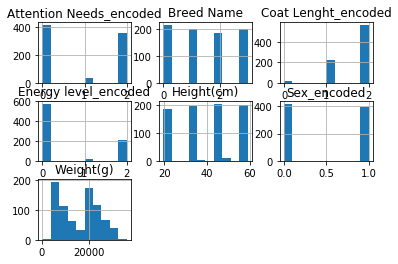

In [437]:
# Vizualizarea Datelor
modified_dataset.hist()

In [438]:
# Handling Categorical Data - continuation
# The Categorical Data is handled using One Hot Encoder.
categorical_columns = ["Energy level", "Attention Needs", "Coat Lenght", "Sex"]
for column in categorical_columns:
    ohe_encoder = OneHotEncoder()
    unique_columns = set(dataset[column].tolist())
    unique_columns = {key: value for key, value in zip(range(len(unique_columns)), unique_columns)}
    aux = ohe_encoder.fit_transform(modified_dataset[column + "_encoded"].values.reshape(-1, 1)).toarray()
    aux = pd.DataFrame(aux, columns=[column + "_" + unique_columns.get(i) for i in range(aux.shape[1])])
    modified_dataset = pd.concat([modified_dataset, aux], axis=1) # concatenate the new columns to old dataset
    modified_dataset = modified_dataset.drop(column + "_encoded", axis=1) # get rid of old columns

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique 

In [439]:
modified_dataset

,Breed Name,Weight(g),Height(cm),Energy level_med,Energy level_low,Energy level_high,Attention Needs_med,Attention Needs_low,Attention Needs_high,Coat Lenght_short,Coat Lenght_long,Coat Lenght_med,Sex_male,Sex_female
0,0,27412.4472,46.4779,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,19184.9322,57.7801,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0,26228.6536,45.6682,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2,7720.7755,20.1153,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,20379.5337,57.5140,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,1,21491.1460,56.7838,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,3,6820.8519,33.5175,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,2,14489.3409,20.8370,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,0,27870.3226,46.1721,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,1,18222.0316,56.9236,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Normalization

S-a folosit Min Max Normalizer pentru normalizarea coloanelor "Weight(g)" si "Height(cm)" in intervalul [0, 1].

In [440]:
# Normalization (Just for Weight(g) and Height(cm)). Using Min Max Normalizer
# (X - min(X)) / (max(X) - min(X))
modified_dataset["Weight(g)"] = (modified_dataset["Weight(g)"] - modified_dataset["Weight(g)"].min()) / (modified_dataset["Weight(g)"].max() - modified_dataset["Weight(g)"].min())
modified_dataset["Height(cm)"] = (modified_dataset["Height(cm)"] - modified_dataset["Height(cm)"].min()) / (modified_dataset["Height(cm)"].max() - modified_dataset["Height(cm)"].min())

In [441]:
modified_dataset

,Breed Name,Weight(g),Height(cm),Energy level_med,Energy level_low,Energy level_high,Attention Needs_med,Attention Needs_low,Attention Needs_high,Coat Lenght_short,Coat Lenght_long,Coat Lenght_med,Sex_male,Sex_female
0,0,0.759598,0.684992,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,0.529946,0.971062,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0,0.726555,0.664498,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2,0.209950,0.017728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,0.563290,0.964327,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,1,0.594318,0.945845,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,3,0.184831,0.356951,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,2,0.398879,0.035995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,0,0.772379,0.677252,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,1,0.503069,0.949383,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Vizualizarea datelor

Au fost plotate cele 4 clase in functie de "Weight(g)" si "Height(cm)"

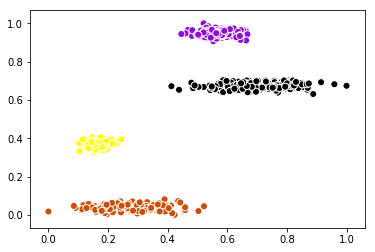

In [442]:
plt.scatter(modified_dataset["Weight(g)"], modified_dataset["Height(cm)"], c=modified_dataset["Breed Name"].values.reshape(-1), s=50,
           cmap="gnuplot",
           edgecolor="white", linewidth=1)

## Impartirea setului de date

Setul de date este impartit in 2 multimi:

X -> Features

y -> Labels

Totodata se va face un random split pe aceste date pentru a avea date de antrenare si date de test

In [443]:
y = modified_dataset["Breed Name"]
X = modified_dataset.drop('Breed Name', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y) # split data into train and set

## Functia plot_decision_boundary

Mai jos este definita functia de plotare a probabilitatii existentei unei clase intr-un anumit punct in functie de model. 

Au fost considerate puncte intre valorile minime si maximne ale datelor continue ("Weight(g)" si "Height(cm)") (adica [0, 1]) si, pentru a putea plota datele, celelalte feature-uri au fost considerate ca fiind valorile majoritare (medii) care se regasesc in datele de test.

Spre exemplu: daca majoritar sexul este male atunci si datele generate vor avea Sex_male = 1 si Sex_female = 0
Definitia functiei de plotare a probabilitatii existentei unei clase intr-un anumit punct in functie de model.

In [444]:
print("Energy Level")
print(x_test["Energy level_low"].mode())
print(x_test["Energy level_med"].mode())
print(x_test["Energy level_high"].mode())
print("Attention Needs")
print(x_test["Attention Needs_low"].mode())
print(x_test["Attention Needs_med"].mode())
print(x_test["Attention Needs_high"].mode())
print("Coat Lenght")
print(x_test["Coat Lenght_short"].mode())
print(x_test["Coat Lenght_med"].mode())
print(x_test["Coat Lenght_long"].mode())
print("Sex")
print(x_test["Sex_male"].mode())
print(x_test["Sex_female"].mode())

Energy Level
0    0.0
dtype: float64
0    1.0
dtype: float64
0    0.0
dtype: float64
Attention Needs
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
Coat Lenght
0    0.0
dtype: float64
0    1.0
dtype: float64
0    0.0
dtype: float64
Sex
0    1.0
dtype: float64
0    0.0
dtype: float64


In [445]:
def plot_decision_boundary(model, X, y, class_number):
    """
    Use this to plot the decision boundary of a trained model.
    """
    other_features = np.array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]) # majoritare
    X = np.array(X)
    y = np.array(y)
    xx, yy = np.mgrid[X[:,0].min():X[:,0].max():.01, X[:,1].min():X[:,1].max():.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    other_features = np.tile(other_features[np.newaxis,:], (grid.shape[0],1)) # copy the same "other_features" so that there are enough for all generated features above
    grid = np.concatenate((grid, other_features), axis=1) # concatenate them
    probs = model.predict_proba(grid)[:, class_number].reshape(xx.shape)
    f, ax = plt.subplots(figsize=(10, 10))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu")
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = {})$".format(class_number))

    ax.scatter(X[:,0], X[:, 1], c=y, s=50,
             cmap="gnuplot",
             edgecolor="white", linewidth=1)

    ax.set(aspect="auto",
         xlabel="$X_1$", ylabel="$X_2$")

## Alegerea celor mai buni hiperparametrii

Pentru alegerea hiperparametrilor s-a rulat KFold cross validation (cu K=5) pentru modelele din cerinta (LogisticRegression, RandomForestClassifier, KNN) cu diferite valori pentru parametrii si au fost alese modelele cu cele mai bune rezultate.

In [446]:
# KFold cross validation for the models that were given where K = 5
kf = KFold(n_splits=5)

for i, (Model, kwargs) in enumerate([(LogisticRegression, {}),
                                     (LogisticRegression, {"C": 1.0, "solver": 'newton-cg', "multi_class": 'multinomial'}), 
                                     (LogisticRegression, {"C": 2.0, "solver": 'newton-cg', "multi_class": 'multinomial'}),
                                     (LogisticRegression, {"C": 1.0, "solver": 'sag', "multi_class": 'multinomial'}),
                                     (LogisticRegression, {"C": 2.0, "solver": 'sag', "multi_class": 'multinomial'}),
                                     (RandomForestClassifier, {}), 
                                     (RandomForestClassifier, {"n_estimators": 50, "criterion": "entropy"}), 
                                     (RandomForestClassifier, {"n_estimators": 50, "criterion": "gini"}), 
                                     (RandomForestClassifier, {"n_estimators": 100, "criterion": "entropy"}), 
                                     (RandomForestClassifier, {"n_estimators": 100, "criterion": "gini"}), 
                                     (KNeighborsClassifier, {}),
                                     (KNeighborsClassifier, {"n_neighbors": 2, "p": 1}),
                                     (KNeighborsClassifier, {"n_neighbors": 2, "p": 2}),
                                     (KNeighborsClassifier, {"n_neighbors": 3, "p": 1}),
                                     (KNeighborsClassifier, {"n_neighbors": 3, "p": 2}),
                                     (KNeighborsClassifier, {"n_neighbors": 4, "p": 1}),
                                     (KNeighborsClassifier, {"n_neighbors": 4, "p": 2}),
                                     (KNeighborsClassifier, {"n_neighbors": 5, "p": 1}),
                                     (KNeighborsClassifier, {"n_neighbors": 5, "p": 2}),
                                    ]):
    accuracies = []
    precisions = []
    f1_scores = []
    print(Model.__name__, kwargs)
    for k, (train_index, test_index) in enumerate(kf.split(x_train)):
        xx_train = x_train.iloc[train_index]
        yy_train = y_train.iloc[train_index]

        xx_validation = x_train.iloc[test_index]
        yy_validation = y_train.iloc[test_index]

        model = Model(**kwargs)
        model.fit(xx_train, yy_train)
        
        accuracy = accuracy_score(yy_validation, model.predict(xx_validation))
        precision = precision_score(yy_validation, model.predict(xx_validation), average="weighted")
        f1 = f1_score(yy_validation, model.predict(xx_validation), average="weighted")
        accuracies.append(accuracy)
        precisions.append(precision)
        f1_scores.append(f1)
        print("split", k, "accuracy", accuracy, "precision", precision, "f1_score", f1)
    print("Average accuracy:", np.average(accuracies))
    print("Average precision:", np.average(precisions))
    print("Average f1 score:", np.average(f1_scores))
    print("--------------------------------------------------------------------------------------------------------")
    print()

LogisticRegression {}
split 0 accuracy 0.9752066115702479 precision 0.9761104099662092 f1_score 0.9752520381492563
split 1 accuracy 1.0 precision 1.0 f1_score 1.0
split 2 accuracy 0.9834710743801653 precision 0.9836944382398928 f1_score 0.9834576424693993
split 3 accuracy 0.95 precision 0.952228120978121 f1_score 0.950187251332178
split 4 accuracy 0.9833333333333333 precision 0.9835526315789473 f1_score 0.9833182674199623
Average accuracy: 0.9784022038567493
Average precision: 0.9791171201526341
Average f1 score: 0.9784430398741591
--------------------------------------------------------------------------------------------------------

LogisticRegression {'C': 1.0, 'solver': 'newton-cg', 'multi_class': 'multinomial'}
split 0 accuracy 1.0 precision 1.0 f1_score 1.0
split 1 accuracy 1.0 precision 1.0 f1_score 1.0
split 2 accuracy 0.9917355371900827 precision 0.9919938016528925 f1_score 0.9917310903443415
split 3 accuracy 0.95 precision 0.952228120978121 f1_score 0.950187251332178
split 4

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_c

split 0 accuracy 1.0 precision 1.0 f1_score 1.0
split 1 accuracy 1.0 precision 1.0 f1_score 1.0
split 2 accuracy 0.9917355371900827 precision 0.9919938016528925 f1_score 0.9917310903443415
split 3 accuracy 0.9583333333333334 precision 0.9593486029889539 f1_score 0.9584098091451032
split 4 accuracy 0.9916666666666667 precision 0.9918859649122808 f1_score 0.9916600331674957
Average accuracy: 0.9883471074380166
Average precision: 0.9886456739108255
Average f1 score: 0.9883601865313881
--------------------------------------------------------------------------------------------------------

LogisticRegression {'C': 1.0, 'solver': 'sag', 'multi_class': 'multinomial'}
split 0 accuracy 1.0 precision 1.0 f1_score 1.0
split 1 accuracy 1.0 precision 1.0 f1_score 1.0
split 2 accuracy 0.9917355371900827 precision 0.9919938016528925 f1_score 0.9917310903443415
split 3 accuracy 0.95 precision 0.952228120978121 f1_score 0.950187251332178
split 4 accuracy 0.9916666666666667 precision 0.9918859649122808

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:2

split 0 accuracy 1.0 precision 1.0 f1_score 1.0
split 1 accuracy 1.0 precision 1.0 f1_score 1.0
split 2 accuracy 1.0 precision 1.0 f1_score 1.0
split 3 accuracy 1.0 precision 1.0 f1_score 1.0
split 4 accuracy 0.9916666666666667 precision 0.9918859649122808 f1_score 0.9916600331674957
Average accuracy: 0.9983333333333334
Average precision: 0.9983771929824561
Average f1 score: 0.9983320066334992
--------------------------------------------------------------------------------------------------------

RandomForestClassifier {'n_estimators': 50, 'criterion': 'gini'}
split 0 accuracy 0.9917355371900827 precision 0.9920205186662867 f1_score 0.9917379946574659
split 1 accuracy 0.9917355371900827 precision 0.9919859754570498 f1_score 0.9917111901638015
split 2 accuracy 1.0 precision 1.0 f1_score 1.0
split 3 accuracy 1.0 precision 1.0 f1_score 1.0
split 4 accuracy 1.0 precision 1.0 f1_score 1.0
Average accuracy: 0.9966942148760332
Average precision: 0.9968012988246674
Average f1 score: 0.9966898

In [447]:
best_models = [
    (LogisticRegression, {"C": 2.0, "solver": 'sag', "multi_class": 'multinomial'}),
    (RandomForestClassifier, {"n_estimators": 50, "criterion": "gini"}), 
    (KNeighborsClassifier, {"n_neighbors": 2, "p": 2})
]

In [448]:
# Using the found parameters, train on everything and test on the test set.
for i, (Model, kwargs) in enumerate(best_models):
    model = Model(**kwargs)
    model.fit(x_train, y_train)
  
    test_accuracy = accuracy_score(model.predict(x_test), y_test)
    test_precision = precision_score(y_test, model.predict(x_test), average="weighted")
    test_f1 = f1_score(y_test, model.predict(x_test), average="weighted")
    print(Model.__name__)
    print()
    print("test accuracy", test_accuracy)
    print("test precision", test_precision)
    print("test f1_score", f1)
    print("------------------------------------")

LogisticRegression

test accuracy 0.9900497512437811
test precision 0.9904731660844712
test f1_score 0.9418318318318318
------------------------------------
RandomForestClassifier

test accuracy 1.0
test precision 1.0
test f1_score 0.9418318318318318
------------------------------------
KNeighborsClassifier

test accuracy 0.9701492537313433
test precision 0.9710820895522388
test f1_score 0.9418318318318318
------------------------------------


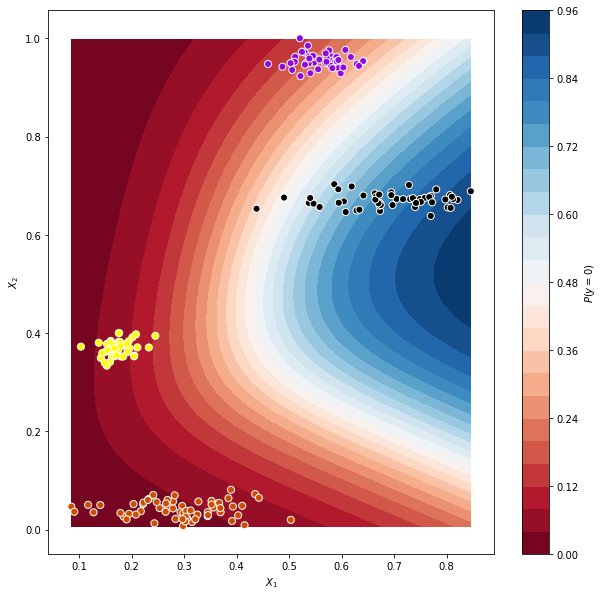

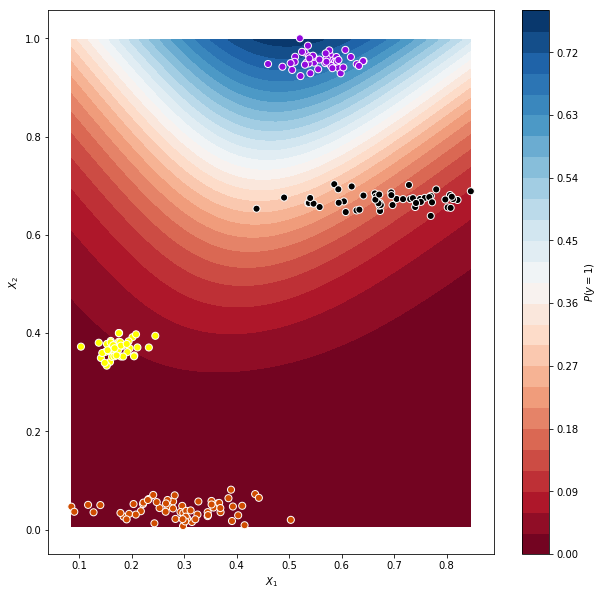

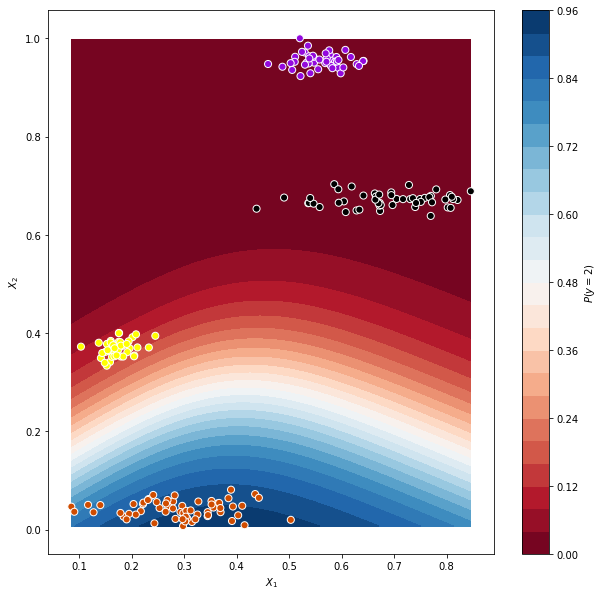

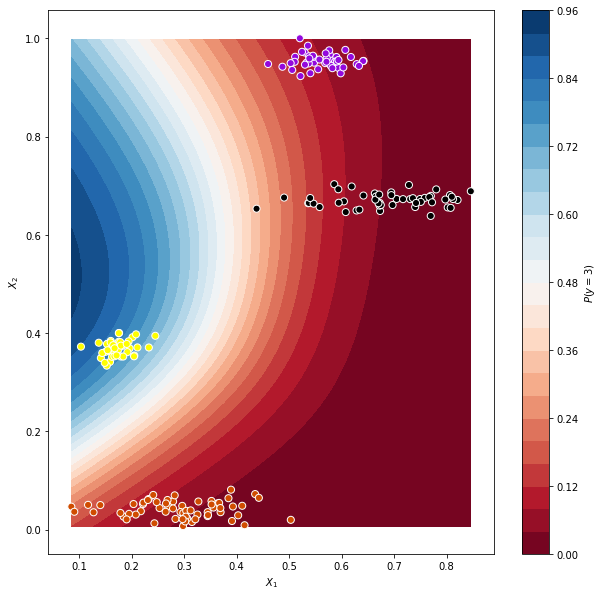

In [449]:
# plot decision boundary for Logistic Regression
Model, kwargs = best_models[0]
model = Model(**kwargs)
model.fit(x_train, y_train)
for cls in range(4):
    plot_decision_boundary(model, x_test, y_test, cls)

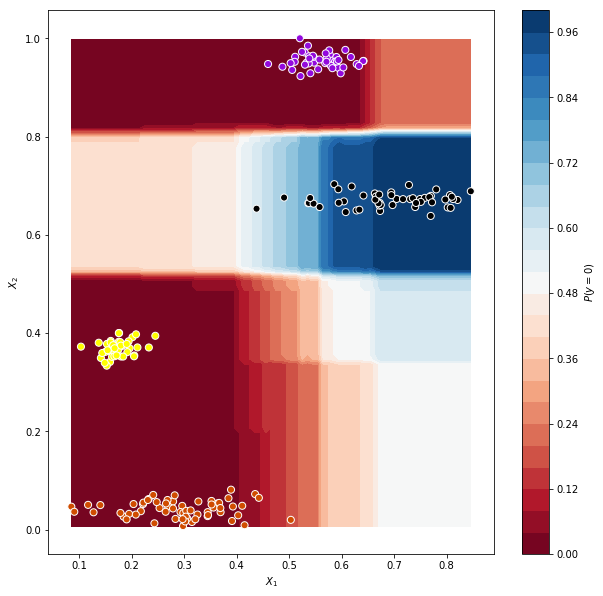

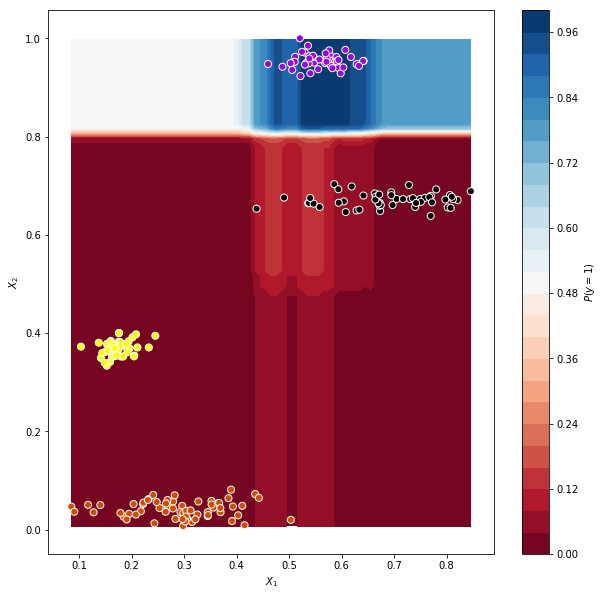

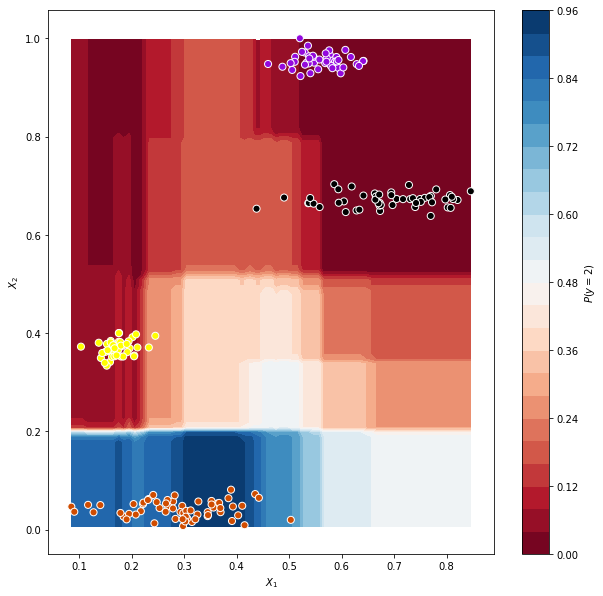

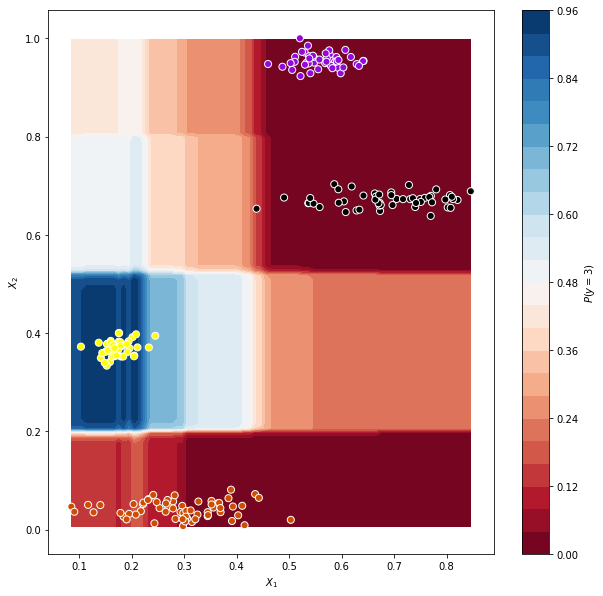

In [450]:
# plot decision boundary for Random Forest
Model, kwargs = best_models[1]
model = Model(**kwargs)
model.fit(x_train, y_train)
for cls in range(4):
    plot_decision_boundary(model, x_test, y_test, cls)

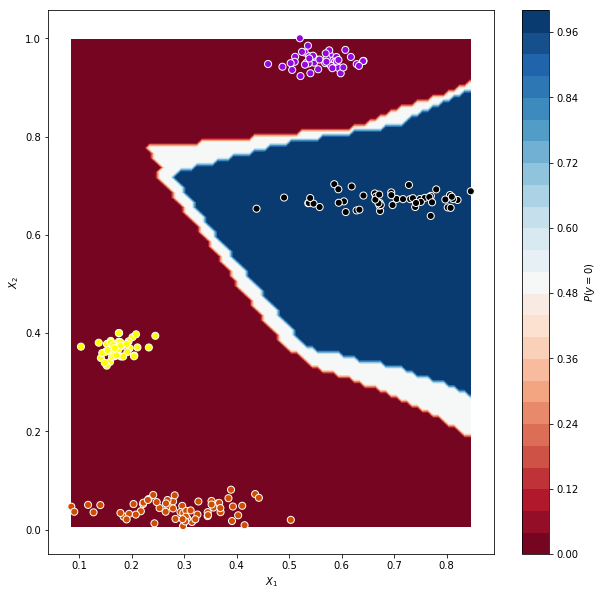

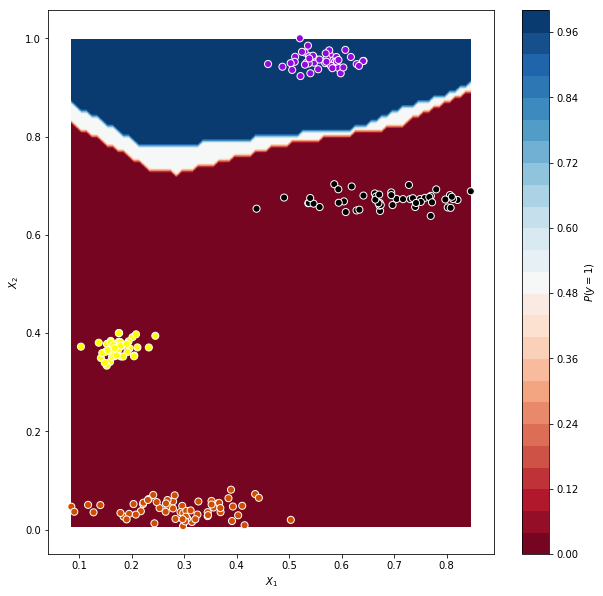

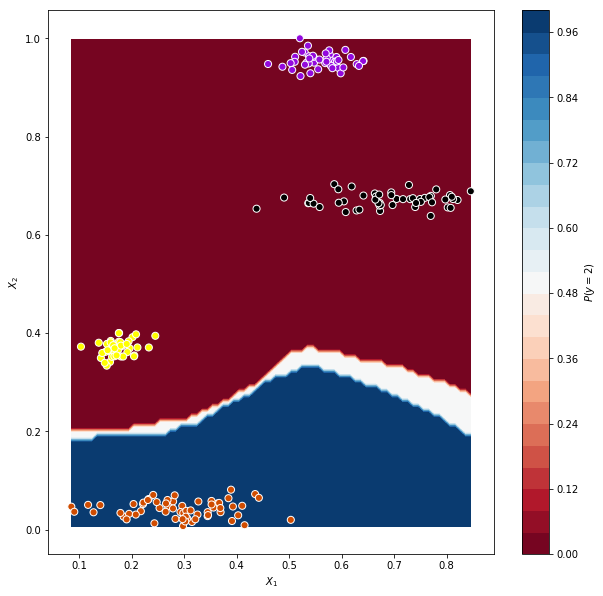

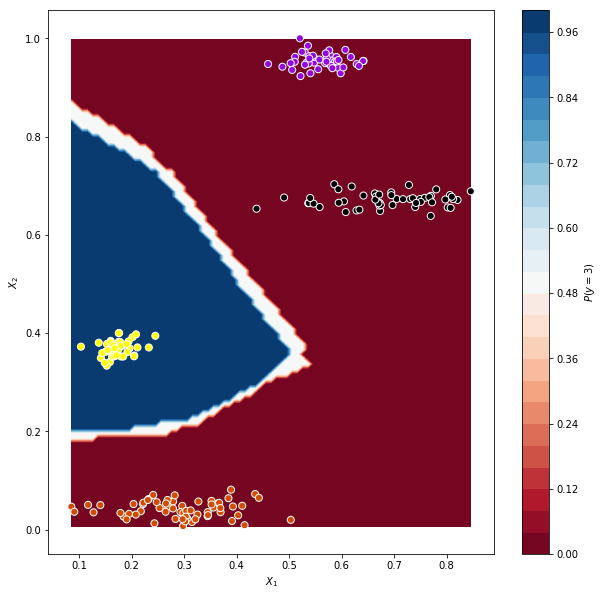

In [451]:
# plot decision boundary for KNN
Model, kwargs = best_models[2]
model = Model(**kwargs)
model.fit(x_train, y_train)
for cls in range(4):
    plot_decision_boundary(model, x_test, y_test, cls)

# Task 2

In [77]:
dataset = pd.read_csv("Holteiu_N_Daniel_Ninel_train.csv")

In [78]:
# get rid of Breed Name
modified_dataset = dataset
modified_dataset = modified_dataset.drop('Breed Name', axis=1)
modified_dataset = modified_dataset.drop('Owner Name', axis=1)
print(modified_dataset)

      Weight(g)  Height(cm)  Longevity(yrs) Energy level Attention Needs  \
0    27412.4472     46.4779         12.7271          med            high   
1    33302.6172         NaN         12.9844          low             med   
2    19184.9322     57.7801         10.1529         high            high   
3    26228.6536     45.6682         13.5366          low             med   
4     7720.7755     20.1153         13.8247         high             med   
5    20379.5337     57.5140         10.2833         high            high   
6    21246.1613         NaN         11.4508         high            high   
7    21491.1460     56.7838         12.8966         high            high   
8    21740.7510         NaN         11.4410         high            high   
9     6820.8519     33.5175         13.6113         high             med   
10   23545.6745         NaN         13.1212          med            high   
11   14489.3409     20.8370         13.5397         high             med   
12   27870.3

In [79]:
# Handling Missing Data
print(modified_dataset.isnull().sum())
modified_dataset = modified_dataset.dropna() # drop missing data
modified_dataset = modified_dataset.reset_index(drop=True)

Weight(g)            0
Height(cm)         196
Longevity(yrs)       0
Energy level         0
Attention Needs      0
Coat Lenght          0
Sex                  0
dtype: int64


In [80]:
print(modified_dataset)

      Weight(g)  Height(cm)  Longevity(yrs) Energy level Attention Needs  \
0    27412.4472     46.4779         12.7271          med            high   
1    19184.9322     57.7801         10.1529         high            high   
2    26228.6536     45.6682         13.5366          low             med   
3     7720.7755     20.1153         13.8247         high             med   
4    20379.5337     57.5140         10.2833         high            high   
5    21491.1460     56.7838         12.8966         high            high   
6     6820.8519     33.5175         13.6113         high             med   
7    14489.3409     20.8370         13.5397         high             med   
8    27870.3226     46.1721         13.0982          med             med   
9    18222.0316     56.9236         10.2664         high            high   
10   14639.3281     20.5574         13.2471         high             med   
11    5891.8975     33.7275         13.4918         high             med   
12   22944.6

In [81]:
# Handling Categorical Data
# The Categorical Data is handled using One Hot Encoder.
categorical_columns = ["Energy level", "Attention Needs", "Coat Lenght", "Sex"]
for column in categorical_columns:
    label_encoder = LabelEncoder()
    ohe_encoder = OneHotEncoder()
    unique_columns = set(dataset[column].tolist())
    unique_columns = {key: value for key, value in zip(range(len(unique_columns)), unique_columns)}
    modified_dataset[column + "_encoded"] = label_encoder.fit_transform(modified_dataset[column])
    aux = ohe_encoder.fit_transform(modified_dataset[column + "_encoded"].values.reshape(-1, 1)).toarray()
    aux = pd.DataFrame(aux, columns=[column + "_" + unique_columns.get(i) for i in range(aux.shape[1])])
    modified_dataset = pd.concat([modified_dataset, aux], axis=1)
    modified_dataset = modified_dataset.drop(column, axis=1)
    modified_dataset = modified_dataset.drop(column + "_encoded", axis=1)

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique 

In [82]:
print(modified_dataset)

      Weight(g)  Height(cm)  Longevity(yrs)  Energy level_med  \
0    27412.4472     46.4779         12.7271               0.0   
1    19184.9322     57.7801         10.1529               1.0   
2    26228.6536     45.6682         13.5366               0.0   
3     7720.7755     20.1153         13.8247               1.0   
4    20379.5337     57.5140         10.2833               1.0   
5    21491.1460     56.7838         12.8966               1.0   
6     6820.8519     33.5175         13.6113               1.0   
7    14489.3409     20.8370         13.5397               1.0   
8    27870.3226     46.1721         13.0982               0.0   
9    18222.0316     56.9236         10.2664               1.0   
10   14639.3281     20.5574         13.2471               1.0   
11    5891.8975     33.7275         13.4918               1.0   
12   22944.6667     56.8545         11.2131               1.0   
13   20387.9993     57.0346         10.8801               0.0   
14    6195.4468     33.34

In [83]:
# Normalization (Just for Weight(g) and Height(cm)). I am using Min Max Normalizer
# (X - min(X)) / (max(X) - min(X))
modified_dataset["Weight(g)"] = (modified_dataset["Weight(g)"] - modified_dataset["Weight(g)"].min()) / (modified_dataset["Weight(g)"].max() - modified_dataset["Weight(g)"].min())
modified_dataset["Height(cm)"] = (modified_dataset["Height(cm)"] - modified_dataset["Height(cm)"].min()) / (modified_dataset["Height(cm)"].max() - modified_dataset["Height(cm)"].min())

In [84]:
modified_dataset

,Weight(g),Height(cm),Longevity(yrs),Energy level_med,Energy level_low,Energy level_high,Attention Needs_med,Attention Needs_low,Attention Needs_high,Coat Lenght_short,Coat Lenght_long,Coat Lenght_med,Sex_male,Sex_female
0,0.759598,0.684992,12.7271,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.529946,0.971062,10.1529,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.726555,0.664498,13.5366,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.209950,0.017728,13.8247,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.563290,0.964327,10.2833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.594318,0.945845,12.8966,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.184831,0.356951,13.6113,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,0.398879,0.035995,13.5397,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,0.772379,0.677252,13.0982,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,0.503069,0.949383,10.2664,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [85]:
y = modified_dataset["Longevity(yrs)"]
test = modified_dataset.drop('Longevity(yrs)', axis=1)
x_train, x_test, y_train, y_test = train_test_split(test, y)

In [88]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures

for i, Model in enumerate([LinearRegression, Ridge, Lasso]):
  model = Model()

  # TODO 2: Train each of the models on the training data
  
  model.fit(x_train, y_train)
  
  # TODO 3: Plot the decision boundary of each model. Use plot_decision_boundary() from above. 
  
  plot_decision_boundary(model, test, y)
  
  accuracy = accuracy_score(model.predict(x_test), y_test)
  print(Model.__name__, accuracy)

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

In [60]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [25]:
y_test = y_test.values

In [26]:
for y1, y2 in zip(y_test, predictions):
    print("y_test = ", y1, " y_predicted = ", y2, " Difference = ", abs(y1 - y2))

y_test =  12.9525  y_predicted =  12.953125  Difference =  0.0006249999999994316
y_test =  11.6935  y_predicted =  11.703125  Difference =  0.009624999999999773
y_test =  11.7113  y_predicted =  13.0625  Difference =  1.3512000000000004
y_test =  14.8145  y_predicted =  13.59375  Difference =  1.2207500000000007
y_test =  13.2699  y_predicted =  13.3125  Difference =  0.04260000000000019
y_test =  13.4846  y_predicted =  13.21875  Difference =  0.26585000000000036
y_test =  9.9589  y_predicted =  11.84375  Difference =  1.8848500000000001
y_test =  11.6165  y_predicted =  13.609375  Difference =  1.9928749999999997
y_test =  12.363  y_predicted =  12.390625  Difference =  0.027625000000000455
y_test =  13.3046  y_predicted =  13.5625  Difference =  0.25789999999999935
y_test =  13.9714  y_predicted =  12.84375  Difference =  1.1276499999999992
y_test =  12.5418  y_predicted =  13.21875  Difference =  0.6769499999999997
y_test =  13.9079  y_predicted =  13.53125  Difference =  0.3766499